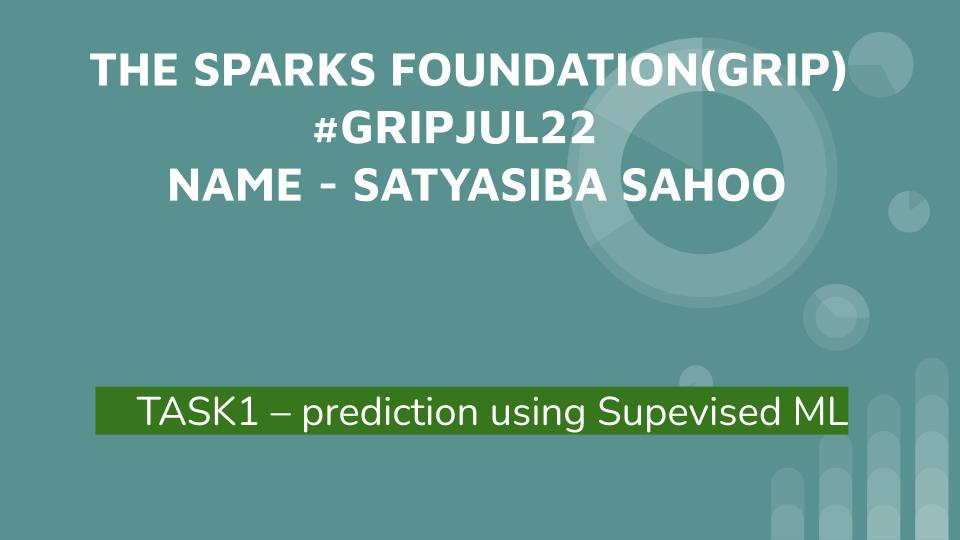# TASK 1

# **NAME -- SATYASIBA SAHOO**

# PREDICTING USING SUPERVISED ML

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error


**IMPORTING DATA SET**

In [2]:
df=pd.read_csv("../input/hour-mark-guess/HoursScores.csv")
print('First Five rows ')
df.head(5)

First Five rows 


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**EDA TO GAIN INSIGHTSFROM THE DATA**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**PLOTTING DATA SET**

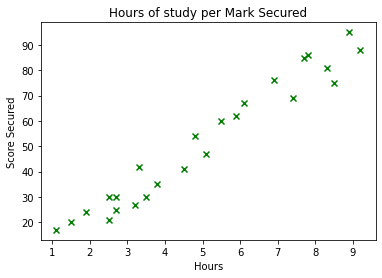

In [5]:
plt.scatter(df.Hours , df.Scores ,color='green' , marker ='x' ,alpha =1)
plt.xlabel('Hours')
plt.ylabel('Score Secured')
plt.title('Hours of study per Mark Secured')
plt.show()


**DETERMINING THE TRAINING AND TESTING DATA SETS**

In [6]:
from sklearn.model_selection import train_test_split
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values
x_train , x_test ,y_train ,y_test =train_test_split(x ,y ,test_size =0.2 ,random_state =0)

**MODEL SELECTION AND TRAINING**

**POSITIVE LINEAR REGRESSION**

In [7]:
model =linear_model.LinearRegression()
model.fit(x_train , y_train)

LinearRegression()

In [8]:
model.coef_[0] , model.intercept_

(9.91065648064224, 2.018160041434662)

**LINEAR REGRESSION LINE******

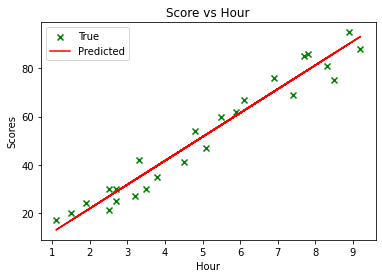

In [9]:
line =model.coef_[0]*x + model.intercept_
plt.scatter(x ,y ,marker ='x' ,color='green' , label=True)
plt.plot(x , line ,color ='red' , label='Predicted')
plt.xlabel('Hour')
plt.ylabel('Scores')
plt.title("Score vs Hour")
plt.legend()
plt.show()

**DETERMINE R square Score**

In [10]:
y_prediction=model.predict(x_test)

print('R2 score : {:^.4f}'.format(r2_score(y_test , y_prediction)))
print('RMSE : {:^.4f}' .format(mean_squared_error(y_test , y_prediction ,squared=False)))
print('MAE : {:^.4f}'.format(mean_absolute_error(y_test , y_prediction)))

R2 score : 0.9455
RMSE : 4.6474
MAE : 4.1839


**Data Frame About Actual And Prediction**

In [11]:
df2=pd.DataFrame ({'Actual' : y_test , 'Prediction' : y_prediction})
df2

,Actual,Prediction
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Predict the Score If the student Studies 9.25hour/day**

In [12]:
hours=9.25
print('No of Hours:',hours)
print('Predicted Score',model.predict([[hours]])[0])

No of Hours: 9.25
Predicted Score 93.69173248737539
